In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime,timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df_airline.isnull().sum()

,0
Month,0
Thousands of Passengers,1


In [6]:
df_airline.dropna(axis=0,inplace=True)

In [7]:
df_airline.isnull().sum()
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


<Axes: xlabel='Month'>

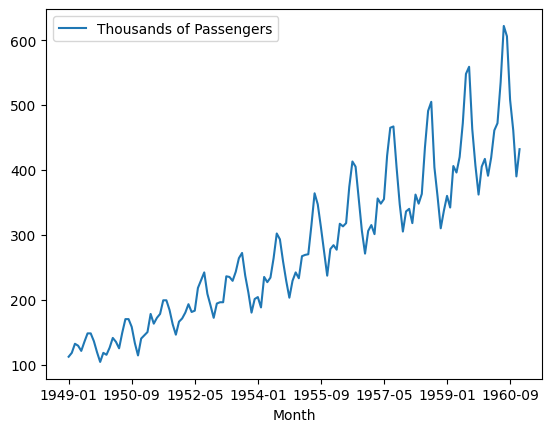

In [8]:
df_airline.set_index('Month',inplace=True)
df_airline.plot()

In [9]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)
df_airline.head()
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [13]:
### 12 months
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

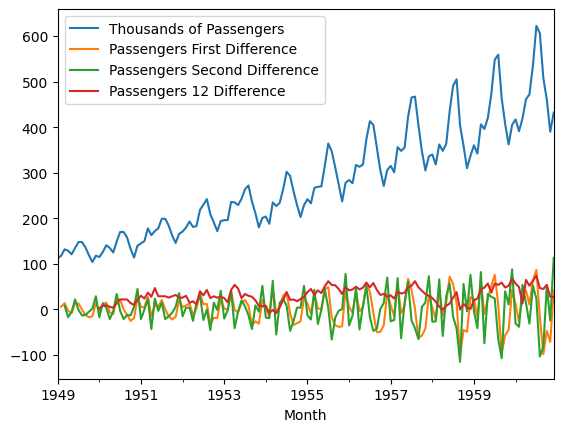

In [39]:
df_airline.plot()

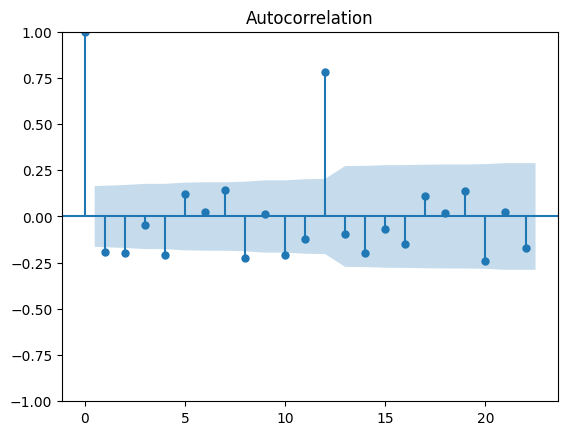

In [14]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

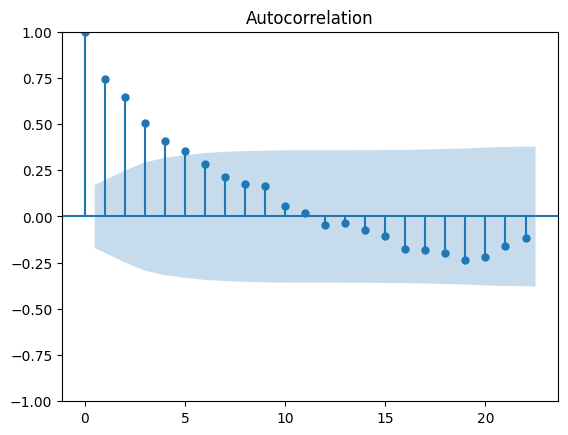

In [15]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())

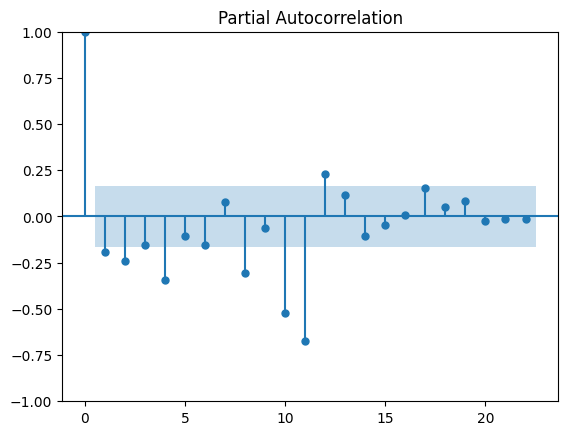

In [16]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())


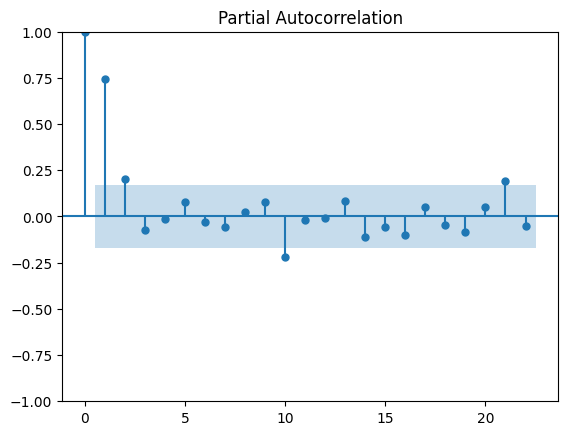

In [17]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())


In [18]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01,112.0,NaN,NaN,NaN
1949-02,118.0,6.0,NaN,NaN
1949-03,132.0,14.0,8.0,NaN
1949-04,129.0,-3.0,-17.0,NaN
1949-05,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08,606.0,-16.0,-103.0,47.0
1960-09,508.0,-98.0,-82.0,45.0
1960-10,461.0,-47.0,51.0,54.0


<Axes: xlabel='Month'>

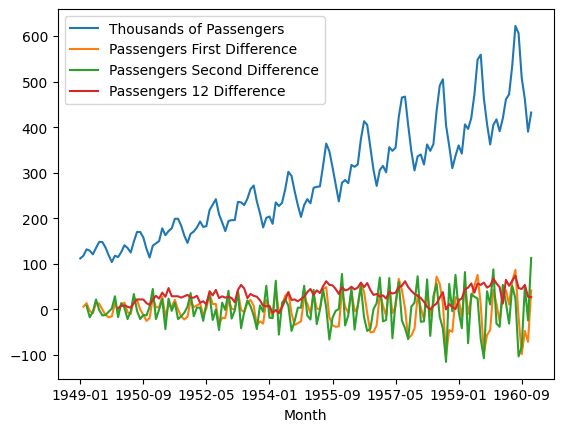

In [19]:
df_airline.plot()

In [20]:
### split train and test data
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)
print(train_dataset_end)
print(test_dataset_end)

1955-12-01 00:00:00
1960-12-01 00:00:00


In [21]:
df_airline.index = pd.to_datetime(df_airline.index)


In [22]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [23]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [24]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [25]:

train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [40]:
## create a ARIMA model
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,12,0))
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(0, 12, 0)   Log Likelihood                -777.856
Date:                     Tue, 13 Aug 2024   AIC                           1557.711
Time:                             04:11:38   BIC                           1559.988
Sample:                         01-01-1949   HQIC                          1558.618
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.199e+08   1.94e+07      6.193      0.000     8.2e+07    1.58e+08
===================================================================================
Ljung-Box (L1) (Q):                  56.91   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.00   Prob(JB):                         0.73
Heteroskedasticity (H):               2.08   Skew:                            -0.00
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,403.397562
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,385.070585
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,349.445081


In [43]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [44]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred
pred


,predicted_mean
1956-01-01,-8.036000e+03
1956-02-01,-9.481400e+04
1956-03-01,-5.857420e+05
1956-04-01,-2.604582e+06
1956-05-01,-9.357690e+06
1956-06-01,-2.883970e+07
1956-07-01,-7.905565e+07
1956-08-01,-1.974357e+08
1956-09-01,-4.569020e+08
1956-10-01,-9.920760e+08


In [45]:
residuals

,0
Month,
1956-01-01,8.320000e+03
1956-02-01,9.509100e+04
1956-03-01,5.860590e+05
1956-04-01,2.604895e+06
1956-05-01,9.358008e+06
1956-06-01,2.884007e+07
1956-07-01,7.905606e+07
1956-08-01,1.974361e+08
1956-09-01,4.569023e+08


<ipython-input-47-e222c59c95df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

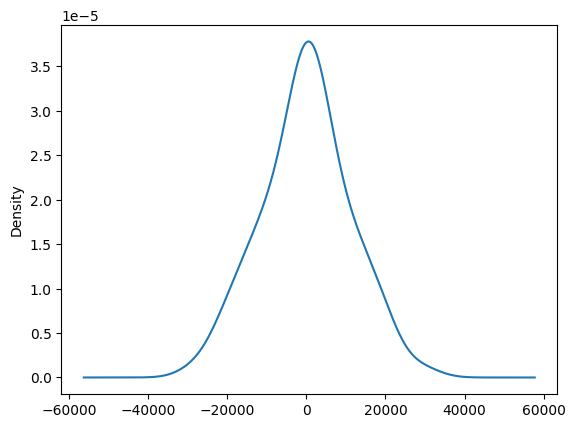

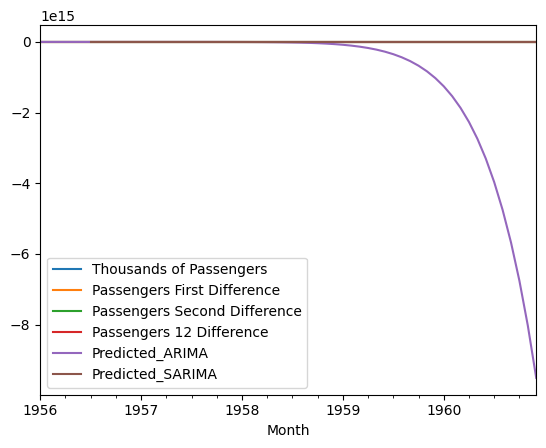

In [47]:
model_Arima_fit.resid.plot(kind='kde')
test_data['Predicted_ARIMA']=pred
test_data.plot()

<Axes: xlabel='Month'>

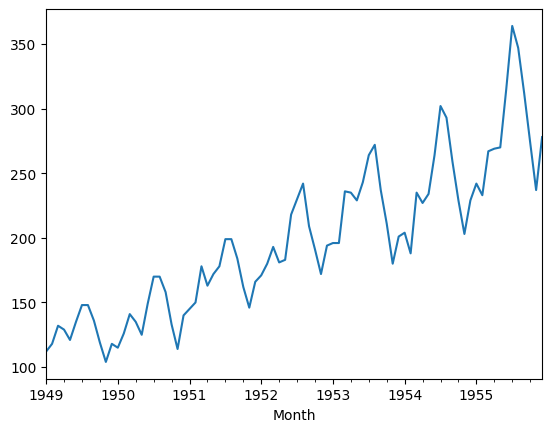

In [48]:
train_data['Thousands of Passengers'].plot()


In [33]:
## create a SARIMA model
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 13 Aug 2024   AIC                            548.481
Time:                                     04:08:54   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
test_data.tail()


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [35]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


<Axes: xlabel='Month', ylabel='Density'>

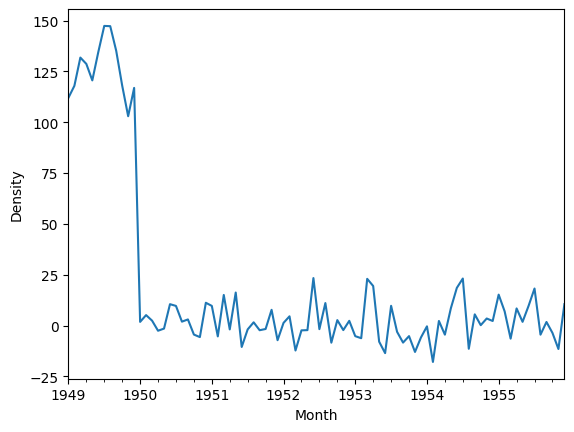

In [36]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima
model_SARIMA_fit.resid.plot()
model_SARIMA_fit.resid.plot(kind='kde')

In [37]:
test_data['Predicted_SARIMA']=pred_Sarima
test_data

<ipython-input-37-18173497469c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,403.397562
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,385.070585
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,349.445081


<Axes: xlabel='Month'>

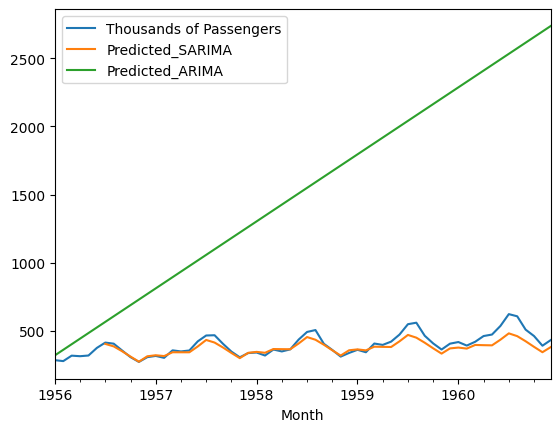

In [38]:

test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

## Summary

ARIMA models are effective for non-seasonal time series data, focusing on autoregressive (AR) and Partial Autocorelation function (PACF) plot to determine AR(p) order and moving average (MA) and (ACF) plot to determine MA(q) order along with differencing to achieve stationarity. SARIMA extends ARIMA by incorporating seasonal effects, making it suitable for data with seasonal patterns by adding seasonal AR, MA components, and seasonal differencing.